<a href="https://colab.research.google.com/github/DD-SQUARED/University-Physics-Projects/blob/main/Instrumental_Magnitude_vs_Airmass_with_Linear_Fit_(B%2C_V%2C_R%2C_I).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

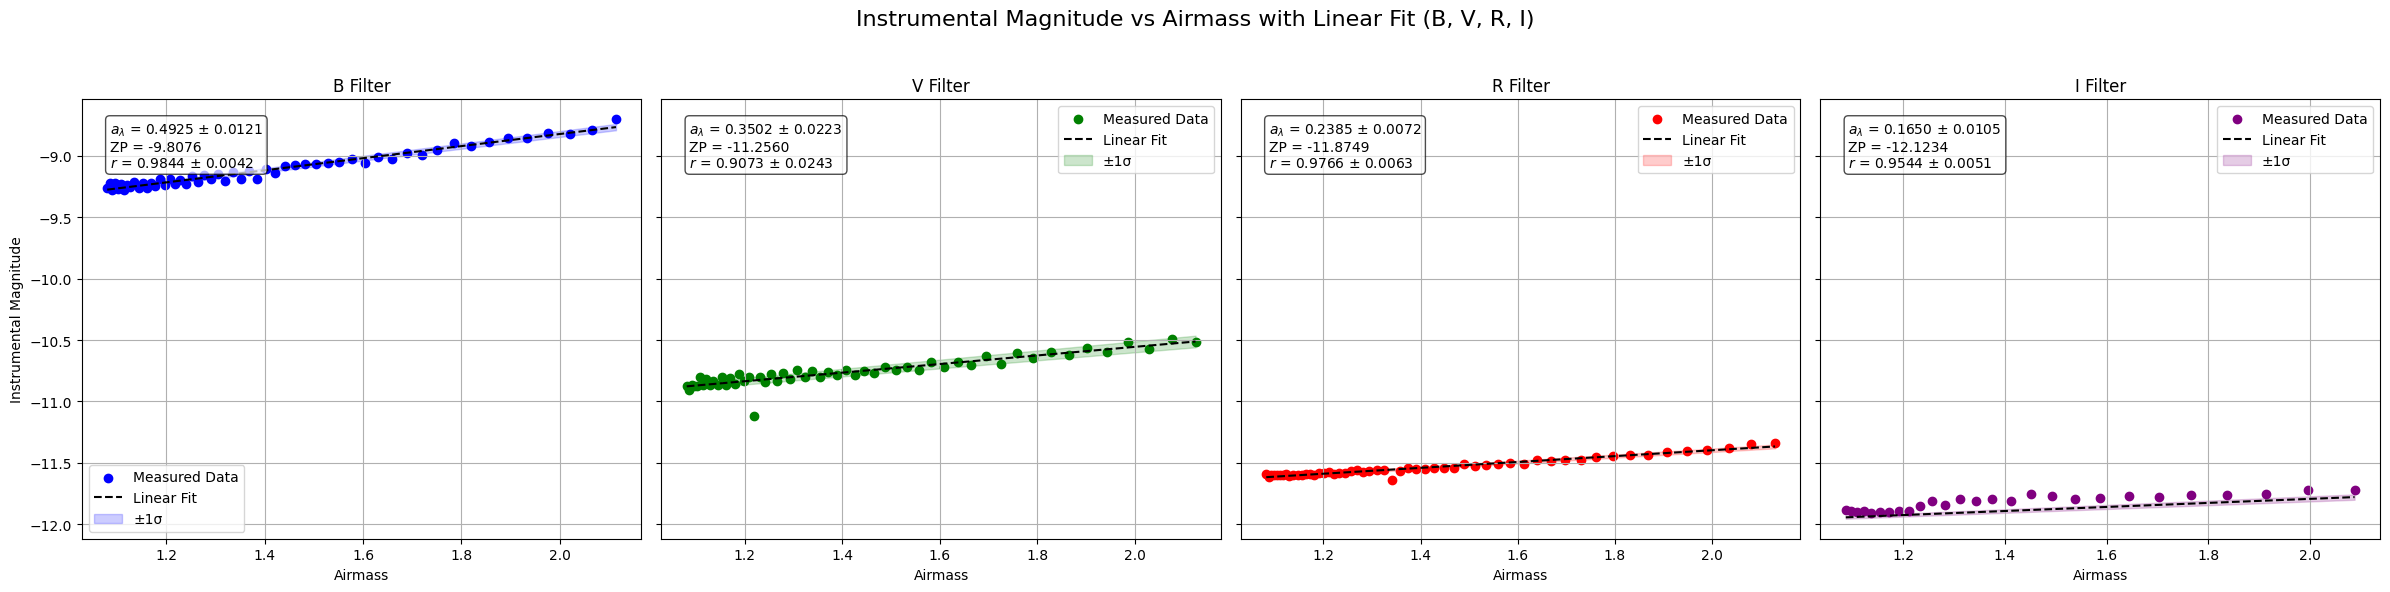

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Define filter files and parameters ===
filter_data = {
    'B': {
        'file': 'B.csv',
        'a_lambda': 0.4925, 'a_lambda_err': 0.0121,
        'ZP': -9.8076,
        'r': 0.9844, 'r_err': 0.0042,
        'color': 'blue'
    },
    'V': {
        'file': 'V.csv',
        'a_lambda': 0.3502, 'a_lambda_err': 0.0223,
        'ZP': -11.2560,
        'r': 0.9073, 'r_err': 0.0243,
        'color': 'green'
    },
    'R': {
        'file': 'R.csv',
        'a_lambda': 0.2385, 'a_lambda_err': 0.0072,
        'ZP': -11.8749,
        'r': 0.9766, 'r_err': 0.0063,
        'color': 'red'
    },
    'I': {
        'file': 'I.csv',  # Assuming you meant to use I.csv here
        'a_lambda': 0.1650, 'a_lambda_err': 0.0105,  # Example values; adjust if needed
        'ZP': -12.1234,
        'r': 0.9544, 'r_err': 0.0051,
        'color': 'purple'
    }
}

# === Plot setup ===
fig, axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

for i, (filt, params) in enumerate(filter_data.items()):
    df = pd.read_csv(params['file'])

    # Calculate Instrumental Magnitude if needed
    if 'Instrumental_Mag' not in df.columns:
        df['Instrumental_Mag'] = -2.5 * np.log10(df['Count_Rate'])

    x = df['Airmass']
    y = df['Instrumental_Mag']

    a = params['a_lambda']
    a_err = params['a_lambda_err']
    zp = params['ZP']
    r = params['r']
    r_err = params['r_err']
    color = params['color']

    ax = axes[i]
    ax.scatter(x, y, color=color, label='Measured Data')

    # Linear fit
    x_vals = np.linspace(min(x), max(x), 100)
    y_fit = zp + a * x_vals
    ax.plot(x_vals, y_fit, 'k--', label='Linear Fit')

    # Error band
    y_upper = zp + (a + a_err) * x_vals
    y_lower = zp + (a - a_err) * x_vals
    ax.fill_between(x_vals, y_lower, y_upper, color=color, alpha=0.2, label='±1σ')

    ax.set_title(f"{filt} Filter")
    ax.set_xlabel("Airmass")
    if i == 0:
        ax.set_ylabel("Instrumental Magnitude")
    ax.invert_yaxis()
    ax.grid(True)
    ax.legend()

    # Annotate extinction info
    text = (f"$a_λ$ = {a:.4f} ± {a_err:.4f}\n"
            f"ZP = {zp:.4f}\n"
            f"$r$ = {r:.4f} ± {r_err:.4f}")
    ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle="round", facecolor='white', alpha=0.7))

plt.suptitle("Instrumental Magnitude vs Airmass with Linear Fit (B, V, R, I)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
